## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

In [3]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=100)
X_train_tsne = tsne.fit_transform(X_train_scaled)

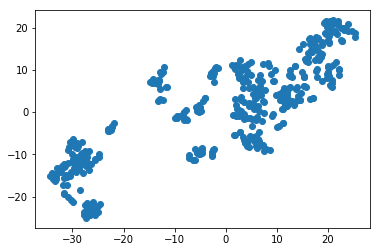

In [18]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [12]:
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
# используйте все признаки из датафрейма X_train.
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter = 100, random_state=42)

train_labels = kmeans.fit_predict(X_train_scaled)

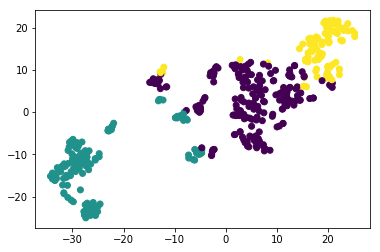

In [14]:
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
#и раскрасьте точки из разных кластеров разными цветами.

plt.scatter(X_train_tsne[:,0], X_train_tsne[:, 1], c=train_labels)
plt.show()

In [35]:
price_train = y_train['price']

In [37]:
# Вычислите средние значения price и CRIM в разных кластерах.
price_0 = price_train[train_labels == 0].mean()
print('Claster 0 price: ', price_0 )

price_1 = price_train[train_labels == 1].mean()
print('Claster 1 price: ', price_1 )

price_2 = price_train[train_labels == 2].mean()
print('Claster 2 price: ', price_2 )

Claster 0 price:  24.971204188481675
Claster 1 price:  16.179687500000004
Claster 2 price:  27.87411764705882


In [28]:
crim = X_train['CRIM']

In [34]:
crim_0 = crim[train_labels == 0].mean()
print('CRIM claster 0:', crim_0)

crim_1 = crim[train_labels == 1].mean()
print('CRIM claster 1:', crim_1)

crim_2 = crim[train_labels == 2].mean()
print('CRIM claster 2:', crim_2)

CRIM claster 0: 0.42098554973821983
CRIM claster 1: 10.637094062500003
CRIM claster 2: 0.0721184705882353


## *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [38]:
test_labels = kmeans.fit_predict(X_test_scaled)

In [39]:
price_test = y_test['price']

In [43]:
# Вычислите средние значения price и CRIM в разных кластерах.
price_0_test = price_test[test_labels == 0].mean()
print('Claster 0 price: ', price_0_test )

price_1_test = price_test[test_labels == 1].mean()
print('Claster 1 price: ', price_1_test )

price_2_test = price_test[test_labels == 2].mean()
print('Claster 2 price: ', price_2_test )

Claster 0 price:  34.55384615384615
Claster 1 price:  16.710526315789473
Claster 2 price:  21.71764705882353


In [45]:
crim_test = X_test['CRIM']

In [46]:
crim_0_test = crim_test[test_labels == 0].mean()
print('CRIM claster 0:', crim_0_test)

crim_1_test = crim_test[test_labels == 1].mean()
print('CRIM claster 1:', crim_1_test)

crim_2_test = crim_test[test_labels == 2].mean()
print('CRIM claster 2:', crim_2_test)

CRIM claster 0: 0.08308461538461537
CRIM claster 1: 9.419181842105264
CRIM claster 2: 0.22250117647058823
